<a href="https://colab.research.google.com/github/Dhamia96/DataAnalysis_STC_TV/blob/main/Copy_of_stc_TV_T3_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STC Jawwy

In [1]:
"""
Here we install libraries that are not installed by default
Example:  pyslsb
Feel free to add any library you are planning to use.
"""
!pip install pyxlsb

In [2]:
# Import the required libraries
"""
Please feel free to import any required libraries as per your needs
"""
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

# Jawwy dataset
The dataset consists of details about each customer and the movies and/or tv shows watched in addition to the genre.

You are required to work on task three to build a recommendation engine for our platform to Recommend movies to usesrs that they might be interested in¶


In [3]:
dataframe = pd.read_excel("/content/stc TV Data Set_T3.xlsb",index_col=0)
# Please make a copy of dataset if you are going to work directly and make changes on the dataset
# you can use   df=dataframe.copy()

In [4]:
# check the data shape
dataframe.shape

(1048575, 5)

In [5]:
# display the first 5 rows
dataframe.head()

,user_id_maped,program_name,rating,date_,program_genre
0,26138,100 treets,1,2017-05-27,Drama
1,7946,Moana,1,2017-05-21,Animation
2,7418,The Mermaid Princess,1,2017-08-10,Animation
3,19307,The Mermaid Princess,2,2017-07-26,Animation
4,15860,Churchill,2,2017-07-07,Biography


In [6]:
# describe the numeric values in the dataset
dataframe.describe()

,user_id_maped,rating
count,1.048575e+06,1.048575e+06
mean,1.709266e+04,2.497283e+00
std,1.003513e+04,1.119837e+00
min,1.000000e+00,1.000000e+00
25%,8.253000e+03,1.000000e+00
50%,1.714900e+04,2.000000e+00
75%,2.566500e+04,3.000000e+00
max,3.428000e+04,4.000000e+00


In [7]:
# check if any column has null value in the dataset
dataframe.isnull().any()

user_id_maped    False
program_name     False
rating           False
date_            False
program_genre    False
dtype: bool

In [8]:

print(f'''-Number of users:{dataframe['user_id_maped'].nunique()}
-Number of programs:{dataframe['program_name'].nunique()}
-Number of genres: {dataframe['program_genre'].nunique()}''')

-Number of users:11578
-Number of programs:8013
-Number of genres: 16


In [9]:
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations

In [10]:
#counting and calculating the average rating for each user
users_ratings = (
    dataframe
    .groupby('user_id_maped', as_index=False)
    .agg({'rating': ['count', 'mean']})
)
users_ratings.columns=['user_id_maped', 'nu_rating', 'avg_rating']
users_ratings['avg_rating']=users_ratings['avg_rating'].round(2)
users_ratings = users_ratings.sort_values(by=['nu_rating'], ascending=False).reset_index(drop=True)

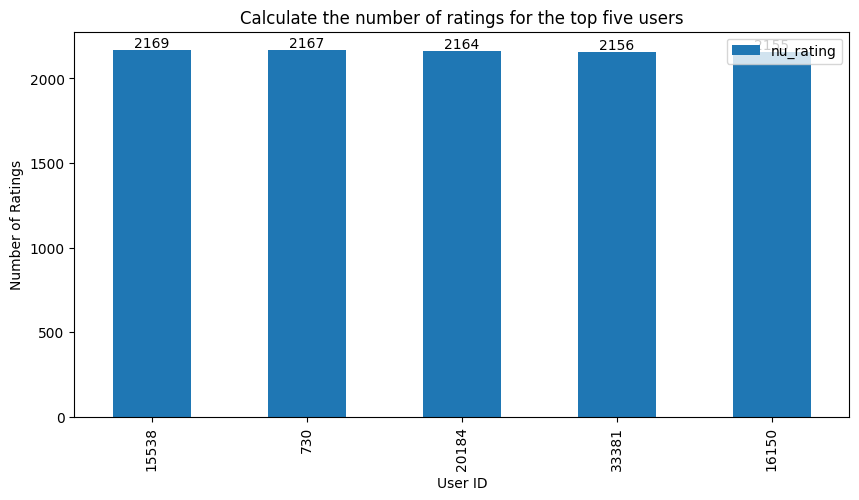

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
users_ratings.head(5).plot(x='user_id_maped', y='nu_rating', kind='bar', ax=ax)

# Add labels and title
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.title('Calculate the number of ratings for the top five users')

# Annotate the bars with the corresponding values
for i, value in enumerate(users_ratings.head(5)['nu_rating']):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Display the plot
plt.show()

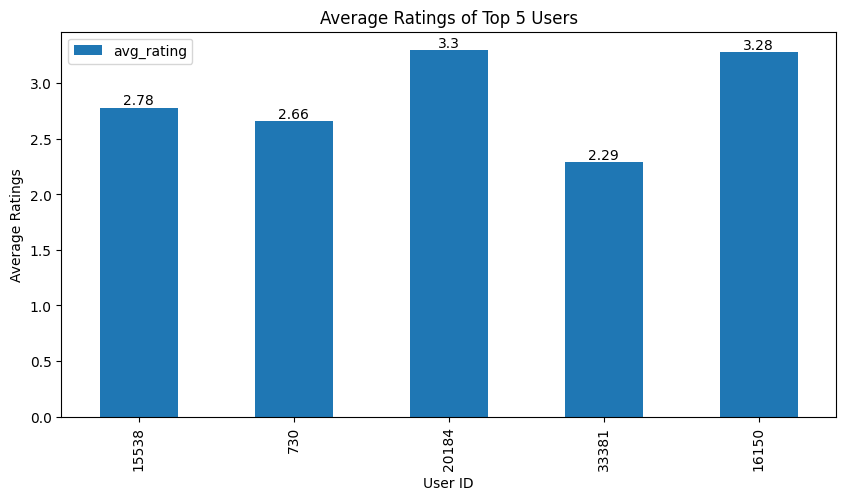

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
users_ratings.head(5).plot(x='user_id_maped', y='avg_rating', kind='bar', ax=ax)

# Add labels and title
plt.xlabel('User ID')
plt.ylabel('Average Ratings')
plt.title('Average Ratings of Top 5 Users')

# Annotate the bars with the corresponding values
for i, value in enumerate(users_ratings.head(5)['avg_rating']):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Display the plot
plt.show()

In [13]:
# Count the most frequently watched genre of program for each user.
grouped_df = dataframe.groupby(['user_id_maped', 'program_genre']).size().reset_index(name='count')

#convert 'count' to a numeric type
grouped_df['count'] = pd.to_numeric(grouped_df['count'])

# Find the most frequent genre for each user_id
most_frequent_genre = grouped_df.groupby('user_id_maped')['count'].idxmax()
most_frequent_genre = grouped_df.loc[most_frequent_genre]
most_frequent_genre= most_frequent_genre.rename(columns={'program_genre': 'most_frequent_genre'})
most_frequent_genre= most_frequent_genre.rename(columns={'count': 'count_most_frequent_genre'})

most_frequent_genre = most_frequent_genre.sort_values(by=['count_most_frequent_genre'], ascending=False).reset_index(drop=True)

most_frequent_genre.head(5)

,user_id_maped,most_frequent_genre,count_most_frequent_genre
0,20184,Animation,2073
1,730,Animation,2052
2,15538,Animation,2018
3,33381,Animation,1947
4,7931,Comedy,1875


In [14]:
#Calculating the average rating for each program
program_ratings= (
 dataframe
 .groupby(['program_name'], as_index=False)
 .agg({'rating': ['mean']})
 )

program_ratings.columns=['program_name', 'avg_rating']
program_ratings['avg_rating']=program_ratings['avg_rating'].round(2)
program_ratings = program_ratings.sort_values(by=['avg_rating'], ascending=False).set_index('program_name')
program_ratings.head()

,avg_rating
program_name,
Criminal Minds Bloodline,4.0
Criminal Minds Painless,4.0
Criminal Minds Lucky,4.0
Al Hob Allathi Kan Ep15,4.0
Criminal Minds Masterpiece,4.0


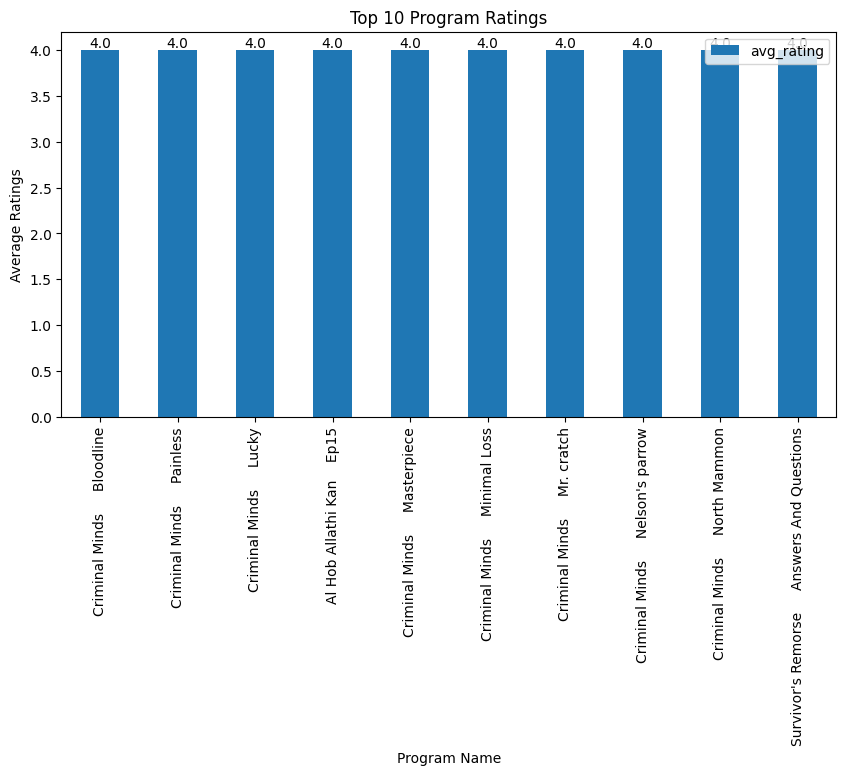

In [15]:

fig, ax = plt.subplots(figsize=(10, 5))
program_ratings.head(10).plot(y='avg_rating', kind='bar', ax=ax)

# Add labels and title
plt.xlabel('Program Name')
plt.ylabel('Average Ratings')
plt.title('Top 10 Program Ratings')

# Annotate the bars with the corresponding values
for i, value in enumerate(program_ratings.head(10)['avg_rating']):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Display the plot
plt.show()

In [16]:
"""
TODO build your Recommender system to Highlight Programs that usesrs might be interested in
"""

'\nTODO build your Recommender system to Highlight Programs that usesrs might be interested in\n'

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
# User-based Collaborative Filtering
pivot_tabel= dataframe.pivot_table(index='user_id_maped', columns='program_name', values='rating', fill_value=0)
user_similarities = cosine_similarity(pivot_tabel)
user_similarities_df=pd.DataFrame(user_similarities, index=pivot_tabel.index,columns=pivot_tabel.index)
user_similarities_df.head()

user_id_maped,1,5,9,11,15,17,20,26,28,30,...,34259,34261,34263,34265,34267,34269,34271,34273,34277,34280
user_id_maped,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.059858,0.085017,0.025987,0.010245,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.033932,0.000000,0.064844,0.314270
5,0.059858,1.000000,0.000000,0.050749,0.000000,0.023802,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.004093,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
9,0.085017,0.000000,1.000000,0.044739,0.041433,0.000000,0.000000,0.000000,0.271629,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.058418,0.230841,0.488482,0.000000
11,0.025987,0.050749,0.044739,1.000000,0.021150,0.007894,0.000000,0.168064,0.000000,0.028333,...,0.000000,0.000000,0.152539,0.0,0.027872,0.0,0.070968,0.000000,0.034124,0.050886
15,0.010245,0.000000,0.041433,0.021150,1.000000,0.000000,0.011267,0.005047,0.048519,0.018150,...,0.042663,0.065196,0.037686,0.0,0.020830,0.0,0.028157,0.020617,0.079218,0.000000


In [18]:
# recommend programs based on users similarity
def user_based_recommendation(user_id, num_recommendations):
    if user_id in dataframe['user_id_maped'].values: #checks if the user_id exists in the 'user_id_maped' column of the dataframe
      similar_users = user_similarities_df[user_id].nlargest(num_recommendations+1).index.tolist()[1:]  # Returns the most similar users and save them on a list then  Exclude the user himself
      programs_list=set()
      user_programs= set(dataframe.loc[dataframe['user_id_maped']==user_id, 'program_name']) #retrieves the programs watched by the given user_id
      for similar_user in similar_users:
        similar_users_programs=set(dataframe.loc[dataframe['user_id_maped'] == similar_user, 'program_name'])
        programs_list.update(similar_users_programs)
        new_programs = list(programs_list - user_programs) #finds the new programs that the given user has not watched yet
      highly_rated_programs= program_ratings.loc[new_programs, 'avg_rating'].nlargest(num_recommendations).index.tolist()
      return highly_rated_programs
    else:
      print("The passed user_ID doesn't exist!")
#user_based_recommendation(730,5) #testing

In [19]:
"""
TODO show the recommendations (top 5) for the people who watched "Moana" movie
"""

'\nTODO show the recommendations (top 5) for the people who watched "Moana" movie\n'

In [20]:
# Content-based Collaborative Filtering
pivot_tabel= dataframe.pivot_table(index='program_name', columns='user_id_maped', values='rating', fill_value=0)
program_similarities = cosine_similarity(pivot_tabel)
program_similarities_df=pd.DataFrame(program_similarities, index=pivot_tabel.index,columns=pivot_tabel.index)
program_similarities_df.head()

program_name,#FollowFriday,10 Days in a Madhouse,100 treets,101 Dalmatians,102 Dalmatians,11.6,12 Monkeys Arms Of Mine,12 Monkeys Atari,12 Monkeys Blood Washed Away,12 Monkeys Bodies Of Water,...,iCarly iLike Jake,iCarly iNevel,iCarly iPilot,iCarly iSpy A Mean Teacher,iCarly iWanna tay With pencer,iCarly iWant A World Record,iCarly iWant More Viewers,iCarly iWill Date Freddie,xXx,xXx: Return of Xander Cage
program_name,,,,,,,,,,,,,,,,,,,,,
#FollowFriday,1.000000,0.134575,0.181502,0.072858,0.115202,0.087170,0.016793,0.020947,0.015573,0.012549,...,0.039047,0.033429,0.062857,0.016291,0.029713,0.021416,0.037901,0.020202,0.114522,0.275853
10 Days in a Madhouse,0.134575,1.000000,0.102884,0.060897,0.071505,0.365651,0.008790,0.015836,0.014671,0.017515,...,0.028056,0.031551,0.034046,0.022369,0.026172,0.027610,0.029077,0.036517,0.085545,0.099757
100 treets,0.181502,0.102884,1.000000,0.070282,0.085572,0.081923,0.020976,0.020734,0.019543,0.023660,...,0.026978,0.022111,0.038579,0.014942,0.024673,0.017002,0.032732,0.020365,0.086611,0.217914
101 Dalmatians,0.072858,0.060897,0.070282,1.000000,0.314139,0.022842,0.026974,0.022431,0.000000,0.000000,...,0.137190,0.115932,0.108595,0.086112,0.103984,0.096691,0.120033,0.107704,0.012946,0.048826
102 Dalmatians,0.115202,0.071505,0.085572,0.314139,1.000000,0.060844,0.000000,0.008074,0.000000,0.000000,...,0.056067,0.044678,0.035405,0.040059,0.025208,0.026495,0.061235,0.033717,0.018640,0.068920


In [21]:
# recommend programs based on  similar programs' ratings
def program_based_recommendation(program_name, num_recommendations):
    if program_name in dataframe['program_name'].values: #checks if program name is availabe in the original dataset
      similar_programs = program_similarities_df[program_name].nlargest(num_recommendations+1).index.tolist()[1:]  # Returns the most similar programs and save them on a list then  Exclude the program itself
      recommendations = []
      for similar_program in similar_programs:
          recommendations.append(similar_program)
      return recommendations
    else:
      print("The passed program does not exist!")
#program_based_recommendation("Moana", 5) #testing

In [22]:
# Example usage
user_id = 26732
num_recommendations = 5

user_based_recs = user_based_recommendation(user_id, num_recommendations)
print(f"Top 5 recommendations for the user= {user_id}: ", user_based_recs)


Top 5 recommendations for the user= 26732:  ['Heroes  Lizards', 'House  Mirror Mirror', 'Heroes  Fight Or Flight', 'Friends     The One With The Memorial ervice', 'Friends     The One Where Monica ings']


In [23]:
#Example usage
program_name='Moana'
num_recommendations= 5
print(f"Top 5 recommendations for the people who watched {program_name} movie:")
program_based_recommendation(program_name, num_recommendations)

Top 5 recommendations for the people who watched Moana movie:


['Trolls',
 "Surf's Up : WaveMania",
 'The Mermaid Princess',
 'The Boss Baby',
 'The Jetsons & WWE: Robo-WrestleMania!']